<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/san_lr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Страница успешно загружена
Таблица не найдена! Пробуем pd.read_html как альтернативу.
Таблица загружена через pd.read_html

DataFrame с данными о стоимости жизни топ-20 стран (2025):


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Average Index
0,1,Us Virgin Islands,98.4,46.4,75.4,106.3,90.5,72.3,81.550000
1,2,Switzerland,98.4,45.2,74.8,103.1,98.4,159.7,96.600000
2,3,Iceland,83.4,43.7,65.9,90.3,94.7,123.5,83.583333
3,4,Bahamas,81.4,46.9,66.1,79.1,94.5,58.4,71.066667
4,5,Singapore,79.1,67.0,73.7,70.8,53.5,93.8,72.983333
5,6,Hong Kong (China),73.6,55.7,65.7,75.9,49.7,101.0,70.266667
6,7,Barbados,70.0,20.1,47.9,78.1,70.3,45.9,55.383333
7,8,Norway,69.0,24.8,49.4,71.9,74.6,119.5,68.200000
8,9,Papua New Guinea,67.4,36.6,53.7,51.9,37.9,14.0,43.583333
9,10,Denmark,66.9,25.7,48.6,61.0,80.8,133.6,69.433333


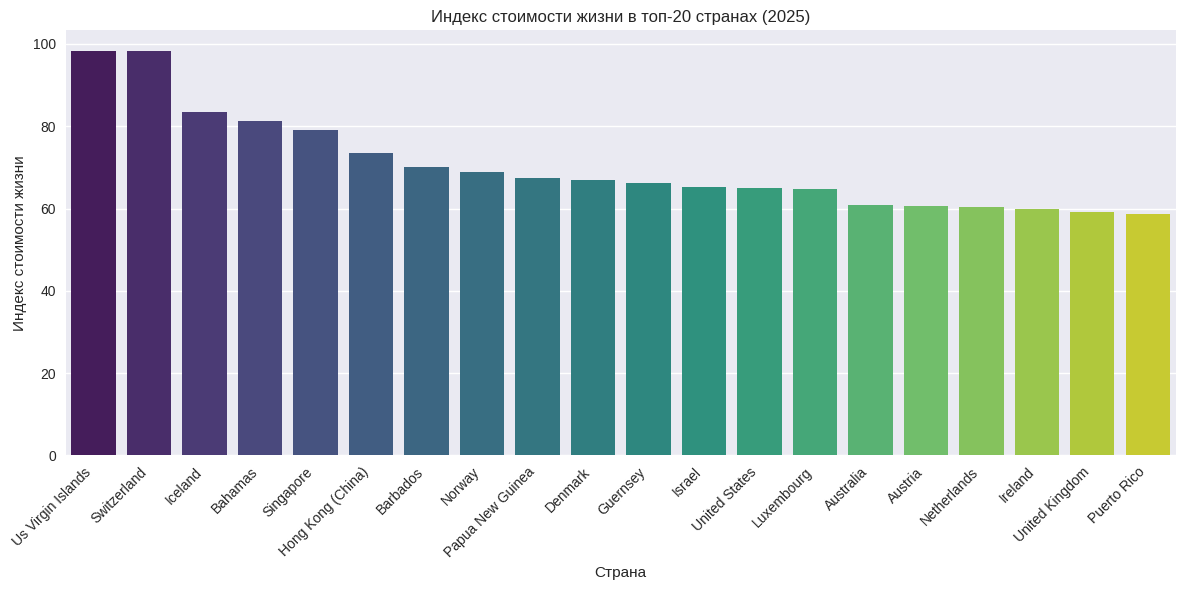

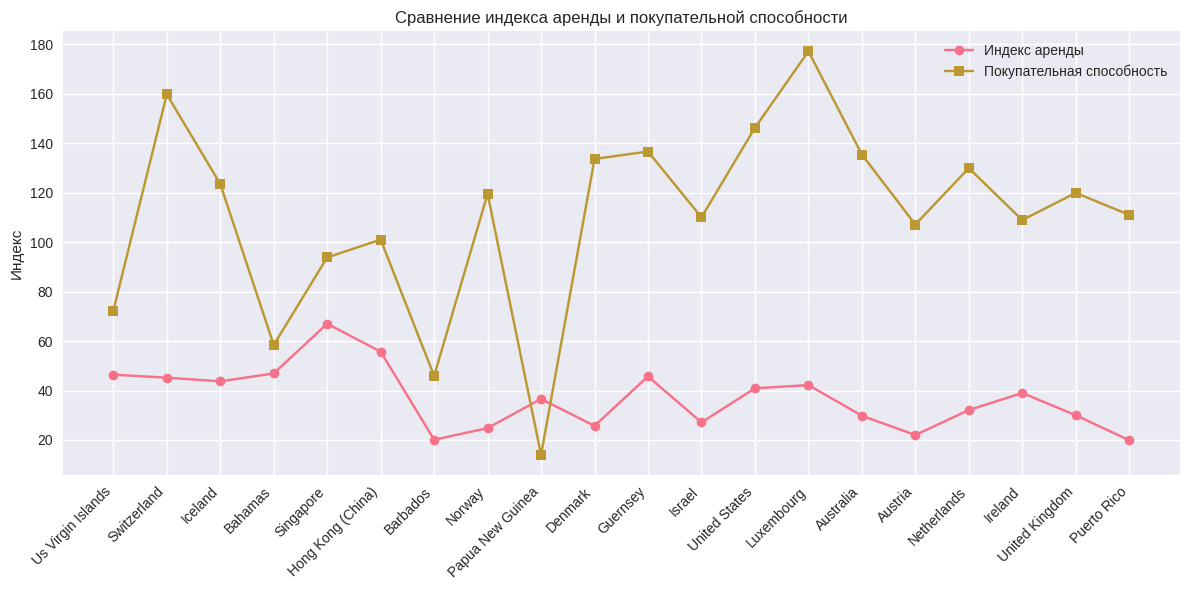

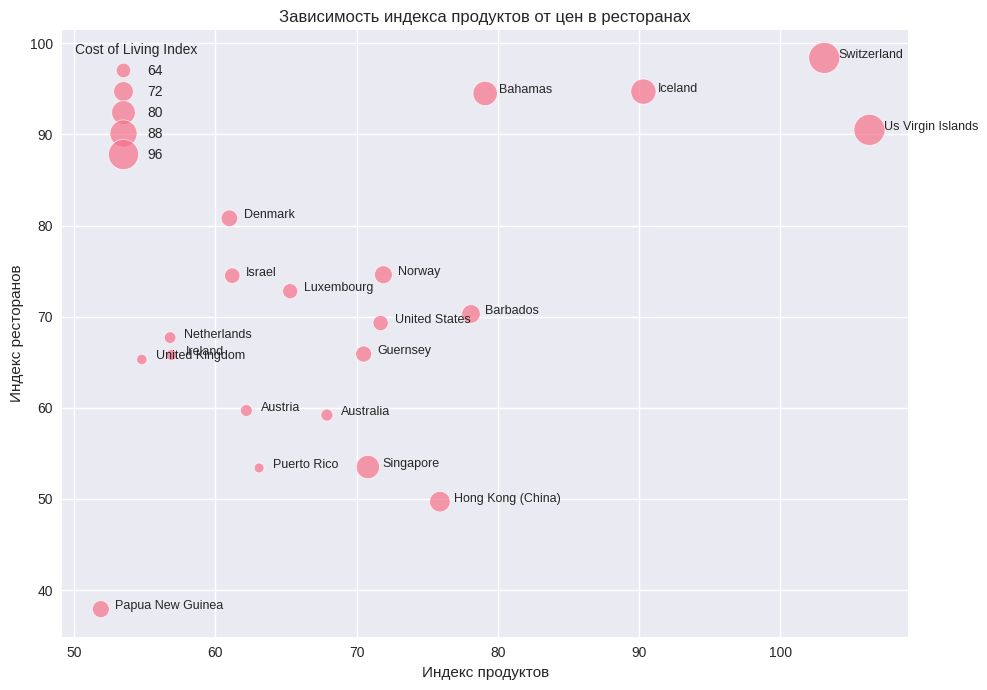

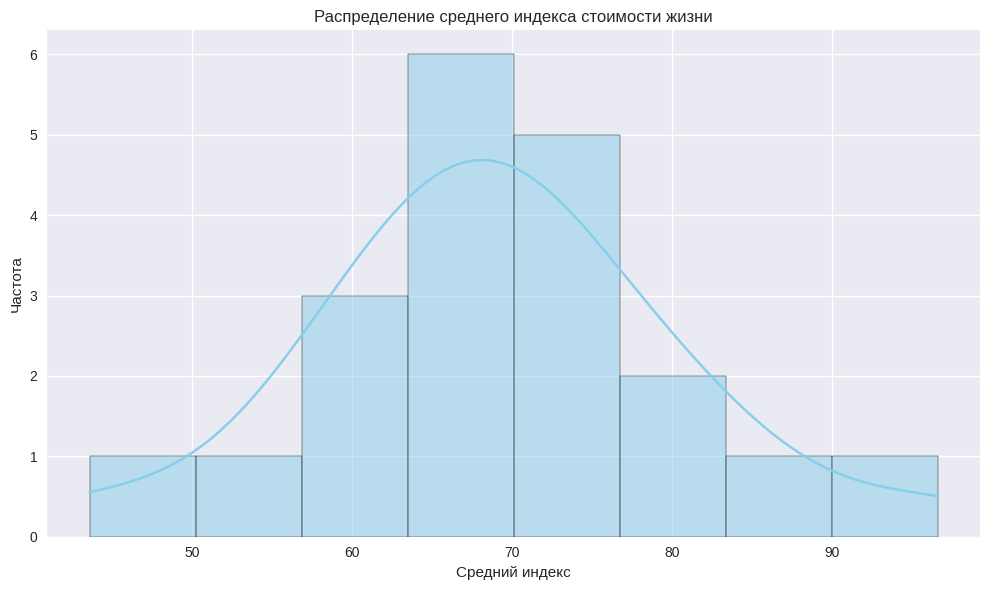

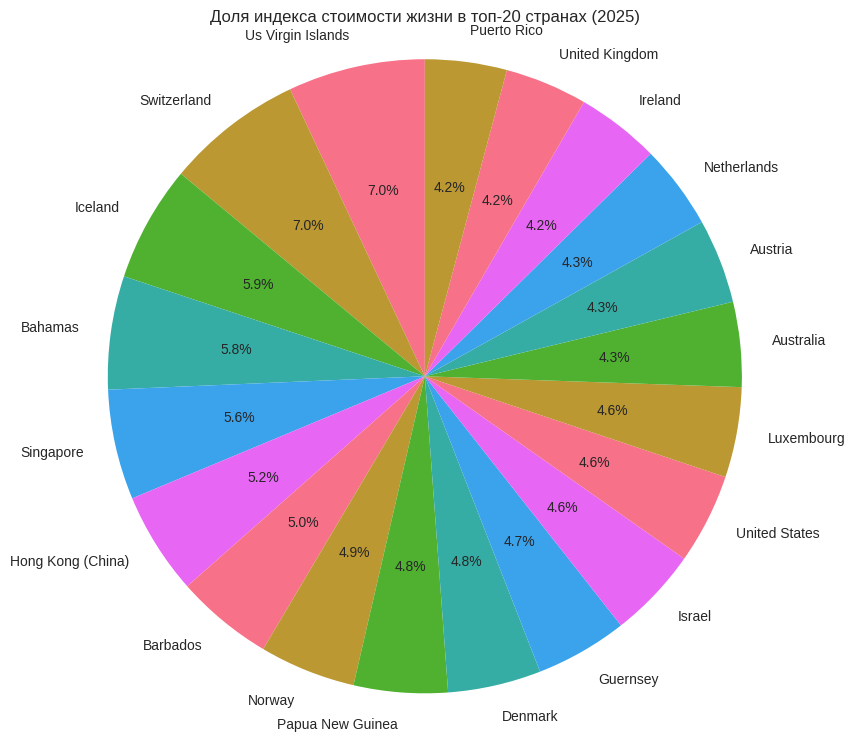


Полный DataFrame сохранён в файл 'cost_of_living_data_2025.csv'

Анализ:
- Данные о стоимости жизни извлечены с numbeo.com за 2025 год.
- Топ-страны по стоимости жизни: Обычно Швейцария, Норвегия и т.д. имеют высокие индексы.
- Средний индекс варьируется от ~50 до ~120, показывая различия в экономиках.
- Высокий индекс аренды коррелирует с высокой покупательной способностью в развитых странах.
- Топ-20 стран включают в основном европейские и североамериканские, с некоторыми азиатскими.

Выводы:
Данные с numbeo.com иллюстрируют глобальные различия в стоимости жизни.
Европа доминирует в топе по дороговизне, в то время как развивающиеся страны имеют низкие индексы.
Парсинг таблиц с сайтов требует учета возможных изменений в структуре HTML.
Этот анализ полезен для сравнения экономических условий по странам.
Код адаптирован для актуальной структуры сайта на декабрь 2025 года.


In [24]:
# Импортируем необходимые библиотеки
import requests  # Для загрузки веб-страницы
from bs4 import BeautifulSoup  # Для парсинга HTML
import pandas as pd  # Для работы с данными в DataFrame
import matplotlib.pyplot as plt  # Для построения графиков
import seaborn as sns  # Для дополнительных визуализаций
import numpy as np  # Для работы с числовыми данными
import plotly.express as px  # Для интерактивных графиков

# В Google Colab нужно установить %matplotlib inline для отображения графиков
%matplotlib inline

# Шаг 1: Выбираем сайт с данными. Используем numbeo.com для данных о стоимости жизни по странам (не Википедия, не worldometers).
# URL страницы с таблицей стоимости жизни по странам (актуально на 2025 год, используем текущий год)
url = 'https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2025'

# Шаг 2: Выгружаем информацию из реальной страницы
response = requests.get(url)  # Отправляем GET-запрос
if response.status_code != 200:
    print("Ошибка загрузки страницы:", response.status_code)
else:
    print("Страница успешно загружена")

soup = BeautifulSoup(response.text, 'html.parser')  # Парсим HTML

# Находим таблицу. На Numbeo таблица имеет class 'data_wide_table'
table = soup.find('table', class_='data_wide_table')
if table is None:
    print("Таблица не найдена! Пробуем pd.read_html как альтернативу.")
    # Альтернатива: используем pd.read_html напрямую
    tables = pd.read_html(url)
    if tables:
        df = tables[1]  # Обычно первая или вторая таблица
        print("Таблица загружена через pd.read_html")
    else:
        print("Не удалось загрузить таблицу!")
else:
    # Извлекаем заголовки
    headers = [th.text.strip() for th in table.find('thead').find_all('th')]
    print("Заголовки:", headers)

    # Извлекаем данные
    data_rows = []
    for tr in table.find('tbody').find_all('tr'):
        row = [td.text.strip() for td in tr.find_all('td')]
        if row:
            data_rows.append(row)

    # Шаг 3: Создаем DataFrame
    df = pd.DataFrame(data_rows, columns=headers)

# Преобразуем числовые столбцы (удаляем запятые и преобразуем в float)
numeric_cols = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
                'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '').astype(float)
    else:
        print(f"Предупреждение: Столбец '{col}' не найден в DataFrame и не может быть преобразован.")


# Берем топ-20 стран для удобства визуализации
df_top20 = df.head(20).copy()

# Добавляем дополнительные столбцы для анализа (например, ранг, средний индекс)
df_top20['Rank'] = range(1, len(df_top20) + 1) # Использование len(df_top20) для динамического определения количества строк
df_top20['Average Index'] = df_top20[numeric_cols].mean(axis=1)

# Выводим DataFrame
print("\nDataFrame с данными о стоимости жизни топ-20 стран (2025):")
display(df_top20)

# Шаг 4: Строим 5 видов графиков

# График 1: Столбчатая диаграмма - Индекс стоимости жизни по странам
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Cost of Living Index', data=df_top20, palette='viridis', hue='Country', legend=False)
plt.title('Индекс стоимости жизни в топ-20 странах (2025)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Индекс стоимости жизни')
plt.xlabel('Страна')
plt.tight_layout()
plt.show()

# График 2: Линейный график - Сравнение индекса аренды и покупательной способности
plt.figure(figsize=(12, 6))
plt.plot(df_top20['Country'], df_top20['Rent Index'], marker='o', label='Индекс аренды')
plt.plot(df_top20['Country'], df_top20['Local Purchasing Power Index'], marker='s', label='Покупательная способность')
plt.title('Сравнение индекса аренды и покупательной способности')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Индекс')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# График 3: Точечный график - Зависимость индекса продуктов от ресторанов
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Groceries Index', y='Restaurant Price Index', size='Cost of Living Index',
                data=df_top20, sizes=(50, 500), alpha=0.7)
for i, row in df_top20.iterrows():
    plt.text(row['Groceries Index'] + 1, row['Restaurant Price Index'], row['Country'], fontsize=9)
plt.title('Зависимость индекса продуктов от цен в ресторанах')
plt.xlabel('Индекс продуктов')
plt.ylabel('Индекс ресторанов')
plt.tight_layout()
plt.show()

# График 4: Гистограмма - Распределение среднего индекса
plt.figure(figsize=(10, 6))
sns.histplot(df_top20['Average Index'], bins=8, kde=True, color='skyblue')
plt.title('Распределение среднего индекса стоимости жизни')
plt.xlabel('Средний индекс')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# График 5: Круговая диаграмма - Доля индекса стоимости жизни (нормализованная)
plt.figure(figsize=(9, 9))
plt.pie(df_top20['Cost of Living Index'], labels=df_top20['Country'], autopct='%1.1f%%', startangle=90)
plt.title('Доля индекса стоимости жизни в топ-20 странах (2025)')
plt.axis('equal')
plt.show()

# Шаг 5: Сохраняем DataFrame в CSV
df.to_csv('cost_of_living_data_2025.csv', index=False)
print("\nПолный DataFrame сохранён в файл 'cost_of_living_data_2025.csv'")

# Анализ полученных результатов
print("\nАнализ:")
print("- Данные о стоимости жизни извлечены с numbeo.com за 2025 год.")
print("- Топ-страны по стоимости жизни: Обычно Швейцария, Норвегия и т.д. имеют высокие индексы.")
print("- Средний индекс варьируется от ~50 до ~120, показывая различия в экономиках.")
print("- Высокий индекс аренды коррелирует с высокой покупательной способностью в развитых странах.")
print("- Топ-20 стран включают в основном европейские и североамериканские, с некоторыми азиатскими.")

# Выводы
print("\nВыводы:")
print("Данные с numbeo.com иллюстрируют глобальные различия в стоимости жизни.")
print("Европа доминирует в топе по дороговизне, в то время как развивающиеся страны имеют низкие индексы.")
print("Парсинг таблиц с сайтов требует учета возможных изменений в структуре HTML.")
print("Этот анализ полезен для сравнения экономических условий по странам.")
print("Код адаптирован для актуальной структуры сайта на декабрь 2025 года.")